In [1]:
# ============================================================
# 0. Required Imports
# ============================================================

import json
from pathlib import Path

import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [2]:
# ============================================================
# 1. Path Setup
# ============================================================

def find_repo_root(marker=".git"):
    here = Path.cwd() if "__file__" not in globals() else Path(__file__).resolve()
    for candidate in [here, *here.parents]:
        if (candidate / marker).exists():
            return candidate
    return here

ROOT = find_repo_root()
DATA = ROOT / "data"

RAW_IMG_DIR  = DATA / "raw" / "images_original"
PROC_IMG_DIR = DATA / "processed" / "images_hashed"
CLEANED_PATH = DATA / "cleaned" / "annotations_fully_cleaned.jsonl"

df = pd.read_json(CLEANED_PATH, lines=True)
print("Loaded", len(df), "records.")
df.head()


Loaded 82 records.


,image,affordance_tags,walkability,risk_level,surface,nav_cue,lighting,density,text_description,source_file,objects,segments,scene_graph,affordance_conflicts,_validation
0,f294b5d8cfe44cae.jpg,"[sidewalk, road]",0.85,medium,pavement,The clear paved sidewalk guides the pedestrian...,night,low,A night scene shows a paved sidewalk stretchin...,IMG_7404.JPEG,"[{'label': 'SUV', 'bbox': [378, 439, 521, 520]...","[{'label': 'sidewalk', 'polygon': [[501, 999],...","[SUV - on - road, sidewalk - next to - road, s...",[],"{'ok': True, 'errors': [], 'warnings': [], 'ex..."
1,c97173c298be1411.jpg,"[sidewalk, road, turn_left, turn_right]",0.75,medium,pavement,A yellow van is parked on the side of a road n...,day,low,A yellow PostBus van is parked on the side of ...,IMG_7328.JPEG,"[{'label': 'van', 'bbox': [288, 142, 638, 597]...","[{'label': 'road', 'polygon': [[0, 799], [0, 4...","[van - parked on - road, sidewalk - adjacent t...",[Sidewalk partially covered with leaves creati...,"{'ok': True, 'errors': [], 'warnings': [], 'ex..."
2,175634c61e022cd5.jpg,"[stairs, sidewalk, narrow_passage, turn_right]",0.75,medium,pavement,The illuminated stairs and paved path lead uph...,night,empty,"An outdoor scene at night features a long, wet...",IMG_7382.JPEG,"[{'label': 'street lamp', 'bbox': [577, 169, 6...","[{'label': 'stairs', 'polygon': [[0, 999], [0,...","[street lamp - illuminates - stairs, street la...",[],"{'ok': True, 'errors': [], 'warnings': [], 'ex..."
3,86e7f0ea27620635.jpg,"[turn_left, turn_right, road, sidewalk, narrow...",0.55,medium,pavement,A large construction barrier blocks the main r...,day,empty,The scene shows a paved road blocked by a cons...,IMG_7320.JPEG,"[{'label': 'car', 'bbox': [638, 432, 856, 563]...","[{'label': 'road', 'polygon': [[178, 505], [37...","[road - leads to - construction barrier, const...","[road blocked by construction barrier, sidewal...","{'ok': True, 'errors': [], 'warnings': [], 'ex..."
4,30e74ded4d3a44bb.jpg,"[sidewalk, narrow_passage, stairs]",0.80,low,pavement,A clear paved path marked with a yellow line l...,day,empty,"A paved sidewalk, partially covered with dry l...",IMG_7329.JPEG,"[{'label': 'covered scooter', 'bbox': [40, 280...","[{'label': 'sidewalk', 'polygon': [[0, 420], [...","[sidewalk - covered with - leaves, covered sco...",[Leaves reduce smoothness of pavement],"{'ok': True, 'errors': [], 'warnings': [], 'ex..."


In [19]:
# ============================================================
# 2. Select an Example Item
# ============================================================

# Pick any index you want to inspect
idx = 2

record = df.iloc[idx]
record


image                                                175634c61e022cd5.jpg
affordance_tags            [stairs, sidewalk, narrow_passage, turn_right]
walkability                                                          0.75
risk_level                                                         medium
surface                                                          pavement
nav_cue                 The illuminated stairs and paved path lead uph...
lighting                                                            night
density                                                             empty
text_description        An outdoor scene at night features a long, wet...
source_file                                                 IMG_7382.JPEG
objects                 [{'label': 'street lamp', 'bbox': [577, 169, 6...
segments                [{'label': 'stairs', 'polygon': [[0, 999], [0,...
scene_graph             [street lamp - illuminates - stairs, street la...
affordance_conflicts                  

Opening: /home/alex/coding/genai-workspace/mlm/data/processed/images_hashed/175634c61e022cd5.jpg


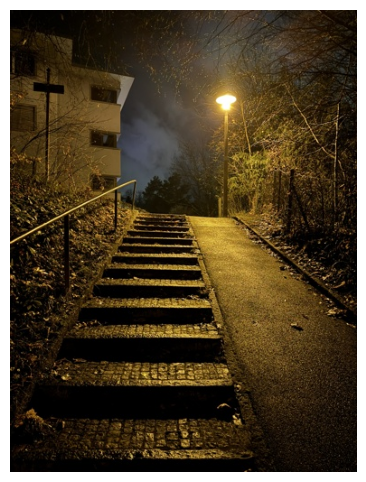

In [20]:
# ============================================================
# 3. Load Image (Corrected)
# ============================================================

# The cleaned annotation record contains:
#   image: the hashed filename (e.g., f294b5d8cfe44cae.jpg)
#   source_file: original filename (IMG_7404.JPEG) – not needed here

image_filename = record["image"]     # <----- This is correct
image_path = PROC_IMG_DIR / image_filename

print("Opening:", image_path)

image = Image.open(image_path)
width, height = image.size

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
plt.show()



In [21]:
# ============================================================
# 4. Print Text Description and Metadata
# ============================================================

print("Image:", record["image"])
print("Source file:", record["source_file"])
print()
print("Affordance tags:", record["affordance_tags"])
print("Walkability:", record["walkability"])
print("Risk level:", record["risk_level"])
print("Surface:", record["surface"])
print("Lighting:", record["lighting"])
print("Density:", record["density"])
print()
print("Text description:")
print(record["text_description"])


Image: 175634c61e022cd5.jpg
Source file: IMG_7382.JPEG

Affordance tags: ['stairs', 'sidewalk', 'narrow_passage', 'turn_right']
Walkability: 0.75
Risk level: medium
Surface: pavement
Lighting: night
Density: empty

Text description:
An outdoor scene at night features a long, wet stone stairway and an adjacent paved path leading uphill, brightly illuminated by a street lamp. A multi-story building stands to the left, while dense, bare trees and bushes line the right side of the path. The ground is covered with fallen leaves and appears damp.


In [22]:
# ============================================================
# 5. Print Objects and Segments
# ============================================================

print("\nObjects:")
for obj in record["objects"]:
    print(f" - {obj['label']}: bbox={obj['bbox']} conf={obj['confidence']}")

print("\nSegments:")
for seg in record["segments"]:
    print(f" - {seg['label']}: {len(seg['polygon'])} points, conf={seg['confidence']}")



Objects:
 - street lamp: bbox=[577, 169, 650, 447] conf=0.9
 - building: bbox=[0, 78, 480, 560] conf=0.9
 - handrail: bbox=[0, 350, 370, 500] conf=0.9
 - signpost: bbox=[0, 140, 160, 420] conf=0.85

Segments:
 - stairs: 5 points, conf=0.9500000000000001
 - sidewalk: 5 points, conf=0.9500000000000001
 - building: 4 points, conf=0.9500000000000001
 - trees: 4 points, conf=0.9
 - vegetation bank: 5 points, conf=0.9
 - night sky: 8 points, conf=0.8


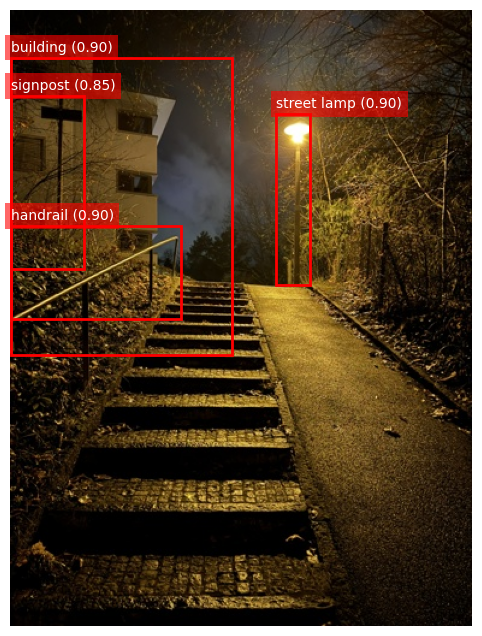

In [23]:
# ============================================================
# 6. Visualize Bounding Boxes (Convert Gemini 0–1000 coords)
# ============================================================

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
ax.axis("off")

for obj in record["objects"]:

    # Gemini box in [x_min, y_min, x_max, y_max] with values 0–1000
    x_min_1000, y_min_1000, x_max_1000, y_max_1000 = obj["bbox"]

    # Convert to pixel coordinates
    x_min = int((x_min_1000 / 1000) * width)
    y_min = int((y_min_1000 / 1000) * height)
    x_max = int((x_max_1000 / 1000) * width)
    y_max = int((y_max_1000 / 1000) * height)

    # Dimensions
    w = x_max - x_min
    h = y_max - y_min

    # Draw rectangle
    rect = patches.Rectangle(
        (x_min, y_min),
        w, h,
        linewidth=2,
        edgecolor="red",
        facecolor="none"
    )
    ax.add_patch(rect)

    # Label
    ax.text(
        x_min,
        y_min - 5,
        f"{obj['label']} ({obj['confidence']:.2f})",
        fontsize=10,
        color="white",
        bbox=dict(facecolor="red", alpha=0.6, edgecolor="none")
    )

plt.show()


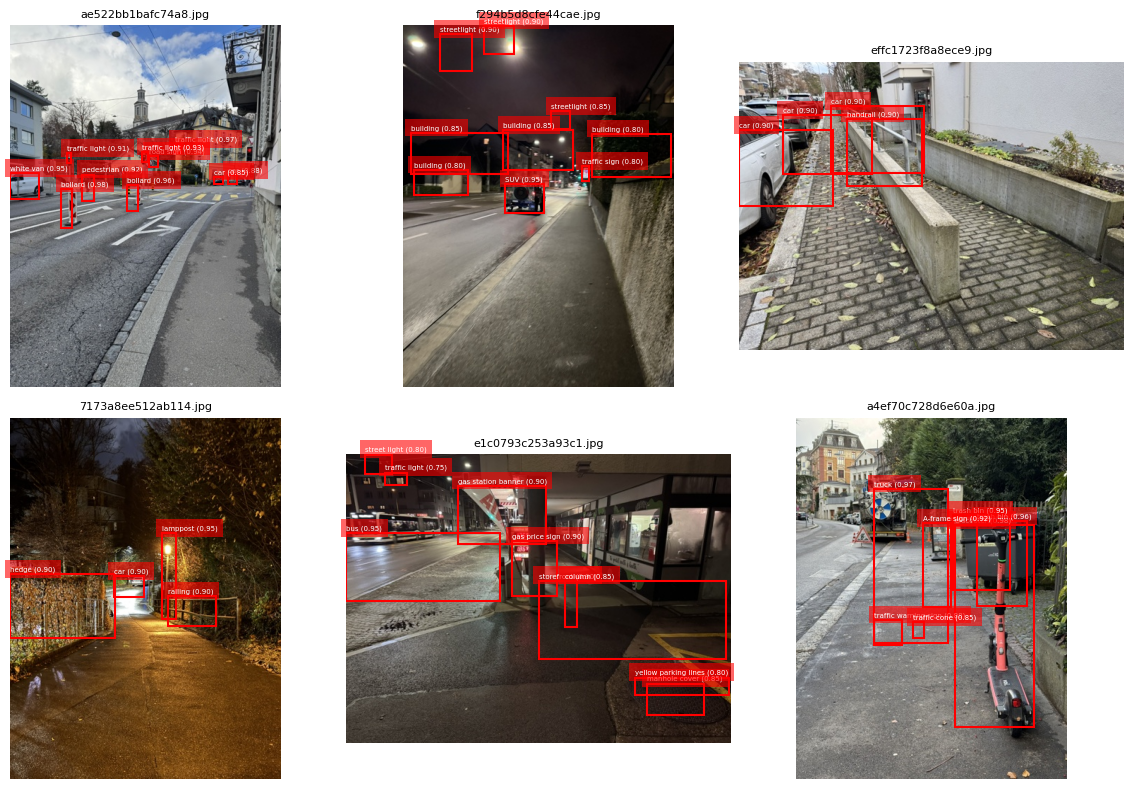

In [30]:
# ============================================================
# 7. Grid of 6 Sampled Images With Bounding Boxes
# ============================================================

import random
from math import ceil

def plot_bbox_grid(df, n_samples=6, n_cols=3, randomize=True):
    """
    Plot a grid of images with Gemini-normalized bounding boxes.

    Args:
        df          : Pandas DataFrame of cleaned annotations
        n_samples   : number of images to display
        n_cols      : grid width
        randomize   : choose random rows vs first N
    """

    # Choose records
    if randomize:
        sample_df = df.sample(n_samples, random_state=42)
    else:
        sample_df = df.iloc[:n_samples]

    n_rows = ceil(n_samples / n_cols)

    fig, axes = plt.subplots(
        n_rows, n_cols, 
        figsize=(4 * n_cols, 4 * n_rows)
    )
    axes = axes.flatten()

    for ax, (_, record) in zip(axes, sample_df.iterrows()):

        # Load image
        image_filename = record["image"]
        image_path = PROC_IMG_DIR / image_filename
        image = Image.open(image_path)
        width, height = image.size

        ax.imshow(image)
        ax.axis("off")

        # Draw bounding boxes (convert Gemini 0–1000 → pixel)
        for obj in record["objects"]:
            x_min_1000, y_min_1000, x_max_1000, y_max_1000 = obj["bbox"]

            x_min = int((x_min_1000 / 1000) * width)
            y_min = int((y_min_1000 / 1000) * height)
            x_max = int((x_max_1000 / 1000) * width)
            y_max = int((y_max_1000 / 1000) * height)

            w = x_max - x_min
            h = y_max - y_min

            rect = patches.Rectangle(
                (x_min, y_min),
                w, h,
                linewidth=1.5,
                edgecolor="red",
                facecolor="none"
            )
            ax.add_patch(rect)

            # Label
            ax.text(
                x_min,
                y_min - 5,
                f"{obj['label']} ({obj['confidence']:.2f})",
                fontsize=5,
                color="white",
                bbox=dict(facecolor="red", alpha=0.6, edgecolor="none")
            )

        ax.set_title(image_filename, fontsize=8)

    # Clean unused axes
    for i in range(len(sample_df), len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


# ---- Run it ----
plot_bbox_grid(df, n_samples=6, n_cols=3, randomize=True)
